# Importing Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pylab
import warnings
import calendar
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'xgboost'

# Loading Datasets

In [26]:
file_path = 'C:\\Users\\joshi\\Desktop\\Unemployment in India.csv'


In [27]:
df = pd.read_csv(file_path)
print(df.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


# Basic Understanding of Data

In [28]:
df.shape

(768, 7)

In [29]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [30]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:

df.dtypes.to_frame().rename(columns={0:"Data-Types"})

,Data-Types
Region,object
Date,object
Frequency,object
Estimated Unemployment Rate (%),float64
Estimated Employed,float64
Estimated Labour Participation Rate (%),float64
Area,object


In [32]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing values"})

,Total No. of Missing values
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [34]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

# Observation

We have to rename two Attributes because we have an extra space in thee columns names:-
1.Region = States

2.Date = Date

3.Estimated Unemployment Rate (%) = Estimated Unemployment Rate (%)

4.Estimated Employed = Estimated Employed

5.Estimated Labour Participation Rate (%) = Estimated Labour Participation Rate (%)

# Changing Attribute Names

In [36]:
df.rename(columns={"Region":"States"," Date":"Date"," Estimated Unemployment Rate (%)":"Estimated Unemployment Rate (%)",
                  " Estimated Employed":"Estimated Employed"," Estimated Labour Participation Rate (%)":
                   "Estimated Labour Participation Rate (%)"},inplace=True)

In [37]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


# Changing the Data-Type of Date Attribute

In [38]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [39]:
df["Month"] = df["Date"].dt.month

In [40]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5.0
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6.0
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7.0
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8.0
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9.0


In [51]:
df["Year"] = df["Date"].dt.year

In [52]:
df.head()

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019.0
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019.0
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019.0
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019.0
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019.0


In [53]:
df["Year"].unique()

array([2019., 2020.,   nan])

In [54]:
df["States"].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [55]:
df["Area"].unique()

array(['Rural', nan, 'Urban'], dtype=object)

In [56]:
round(df.select_dtypes(include=["float","int"]).describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,11.79,10.72,0.00,4.66,8.35,15.89,76.74
Estimated Employed,740.0,7204460.03,8087988.43,49420.00,1190404.50,4744178.50,11275489.50,45777509.00
Estimated Labour Participation Rate (%),740.0,42.63,8.11,13.33,38.06,41.16,45.50,72.57
Year,740.0,2019.42,0.49,2019.00,2019.00,2019.00,2020.00,2020.00


# Observation
1. We can observe that the maxium unemployment rate was almost near to 77% which is very huge. It menas that more than 3/4 of employees layoffs were done.

2.We can also observe that the maximum labour rate was almost near to 73% which is very huge

Insights

We can fetch those state names having those kind of drastic rate values.

In [57]:
df[df["Estimated Unemployment Rate (%)"]>76]

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Year
627,Puducherry,2020-04-30,Monthly,76.74,68122.0,35.54,Urban,2020.0


In [58]:
round(df.groupby(["States"])[["Estimated Unemployment Rate (%)","Estimated Employed",
                              "Estimated Labour Participation Rate (%)"]].mean(),2).sort_values(by="Estimated Unemployment Rate (%)",ascending=False)

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
States,,,
Tripura,28.35,717002.64,61.82
Haryana,26.28,3557072.46,42.74
Jharkhand,20.58,4469240.43,41.67
Bihar,18.92,12366189.14,38.15
Himachal Pradesh,18.54,1059823.71,44.22
Delhi,16.50,2627512.86,38.93
Jammu & Kashmir,16.19,1799931.67,41.03
Chandigarh,15.99,316831.25,39.34
Rajasthan,14.06,10041064.75,39.97


# Insights
Tripura was having the highest average amount of unemployment rate.
Meghalaya was having the lowest average amount of unemployment rate.

# Exploratory Data Analysis(EDA)

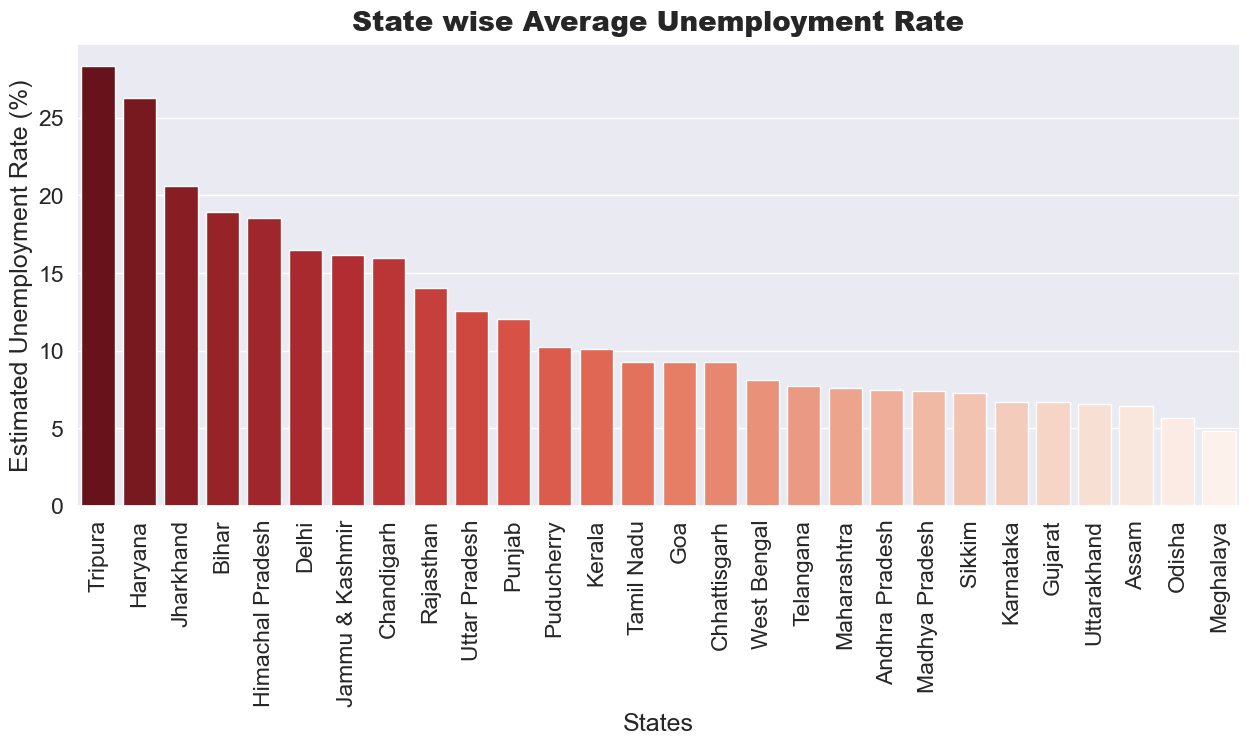

In [59]:
x = df.groupby(["States"])["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(15,6))
sns.barplot(x.index,x["Estimated Unemployment Rate (%)"],palette=sns.color_palette("Reds",28)[::-1])
plt.title("State wise Average Unemployment Rate",fontweight="black",fontsize=20,pad=10)
plt.xticks(rotation=90)
plt.show()

# Insights

1.We can clearly observe that Tripura is having the Highest Average Unemplyment Rate followed by Haryana.

2.Meghalaya state is having the lowest Average Unemplyment Rate followed by Odisha.



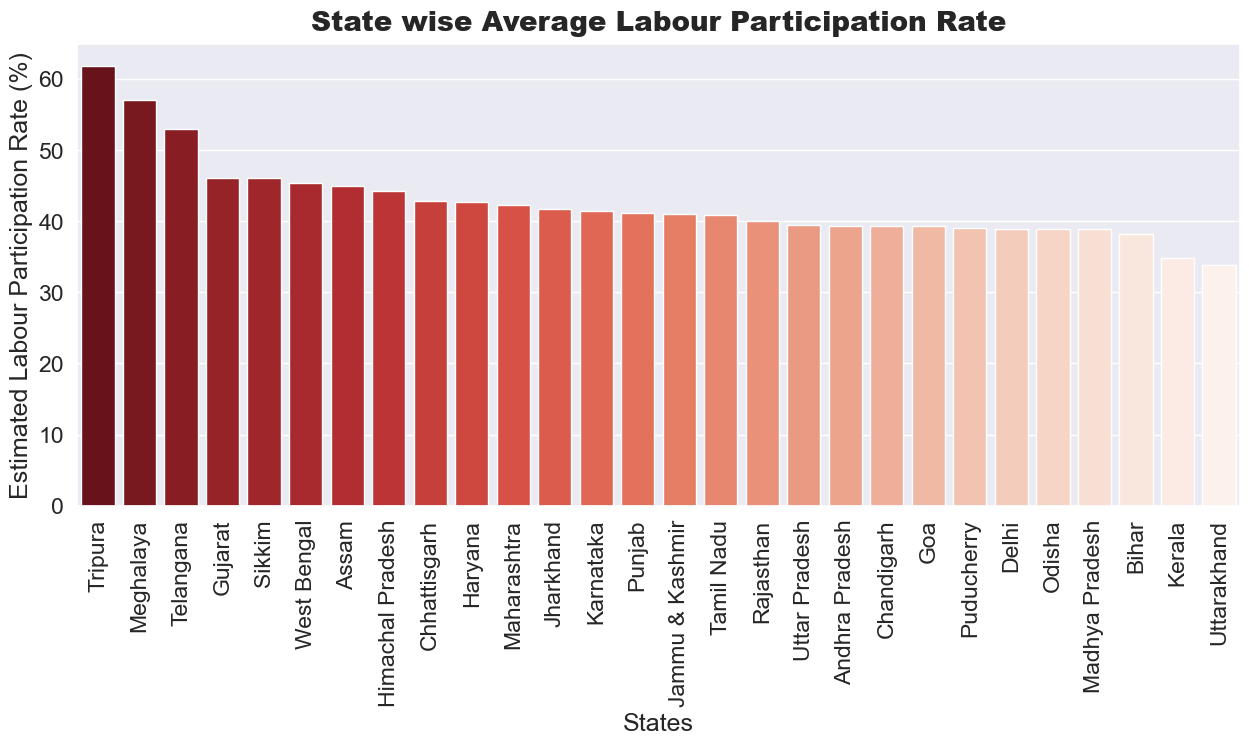

In [60]:
x = df.groupby(["States"])["Estimated Labour Participation Rate (%)"].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(15,6))
sns.barplot(x.index,x["Estimated Labour Participation Rate (%)"],palette=sns.color_palette("Reds",28)[::-1])
plt.title("State wise Average Labour Participation Rate",fontweight="black",fontsize=20,pad=10)
plt.xticks(rotation=90)
plt.show()

# Insights

1.We can observe that Tripura is having the highest Labour participation Rate followed by Meghalaya.

2.We can also observe that uttarakhand is having the lowest Labour participation Rate followed by Kerala.


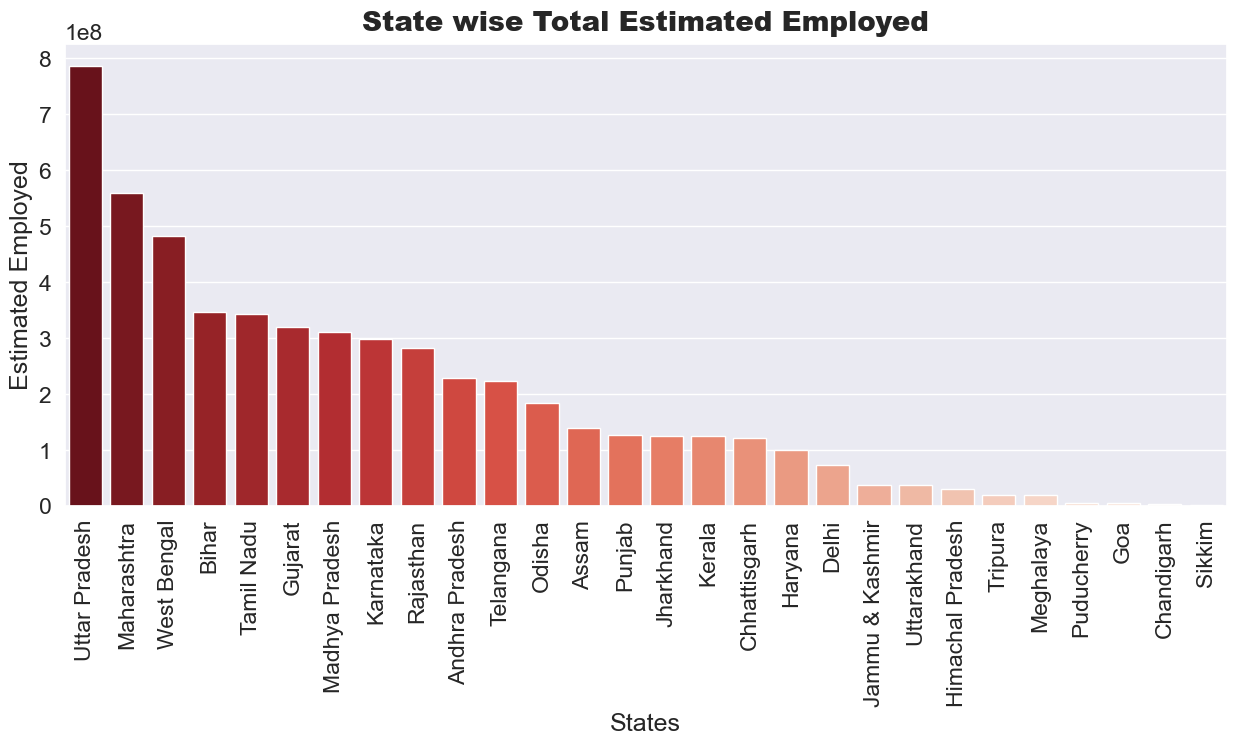

In [72]:
x = df.groupby(["States"])["Estimated Employed"].sum().sort_values(ascending=False).to_frame()
plt.figure(figsize=(15,6))
sns.barplot(x.index,x["Estimated Employed"],palette=sns.color_palette("Reds",28)[::-1])
plt.title("State wise Total Estimated Employed",fontweight="black",fontsize=20,pad=10)
plt.xticks(rotation=90)
plt.show()


# Insights

1.We can observe that Uttar Pradesh is having the highest total estimated employed followed by Maharashtra.

2.Sikkim is having the lowest total estimated employed followed by chandigarh

3.So we can make an insight that estimated employe is totally dependend on populatuion



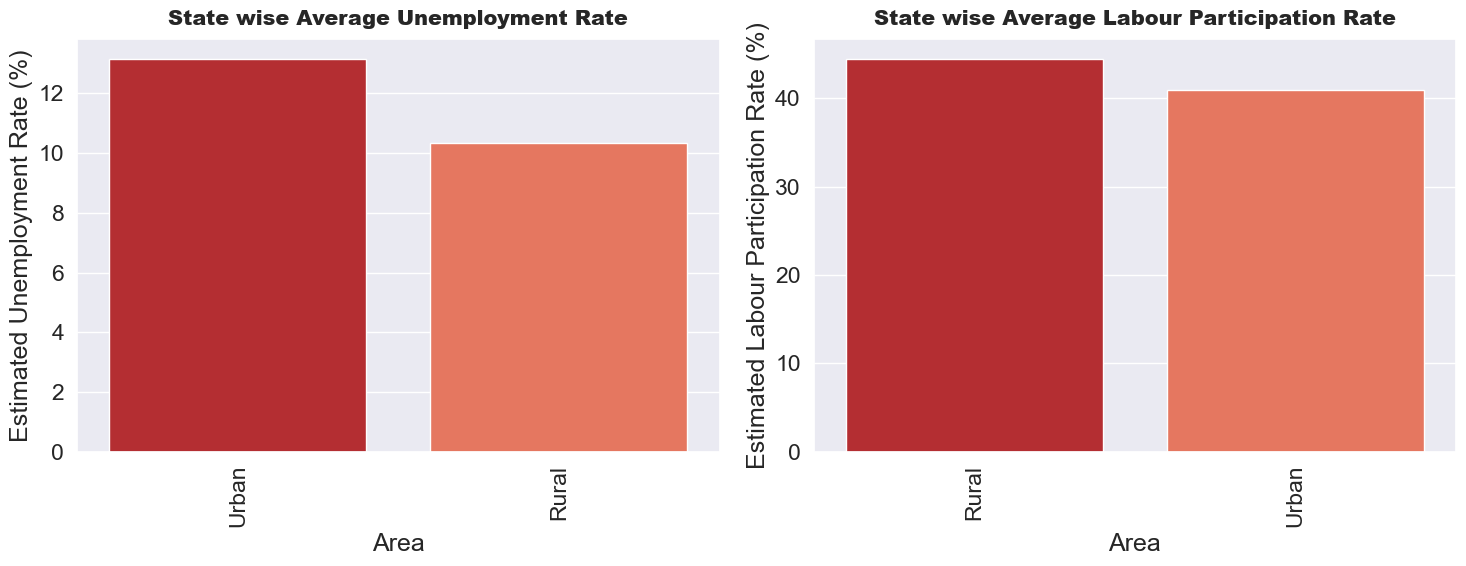

In [62]:
x = df.groupby(["Area"])["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x.index,x["Estimated Unemployment Rate (%)"],palette=sns.color_palette("Reds",3)[::-1])
plt.title("State wise Average Unemployment Rate",fontweight="black",fontsize=15,pad=10)
plt.xticks(rotation=90)

z = df.groupby(["Area"])["Estimated Labour Participation Rate (%)"].mean().sort_values(ascending=False).to_frame()
plt.subplot(1,2,2)
sns.barplot(z.index,z["Estimated Labour Participation Rate (%)"],palette=sns.color_palette("Reds",3)[::-1])
plt.title("State wise Average Labour Participation Rate",fontweight="black",fontsize=15,pad=10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Observation

1. We can clearly observe that Urban Area is having more unemployment rate when compared to Rural Area

2. But when it comes to labour participation rate, rural area is having more labours when compared with urban area.

Insights

Urban Area is having more unemployment rate even though of low labour rate when compared with rural area.

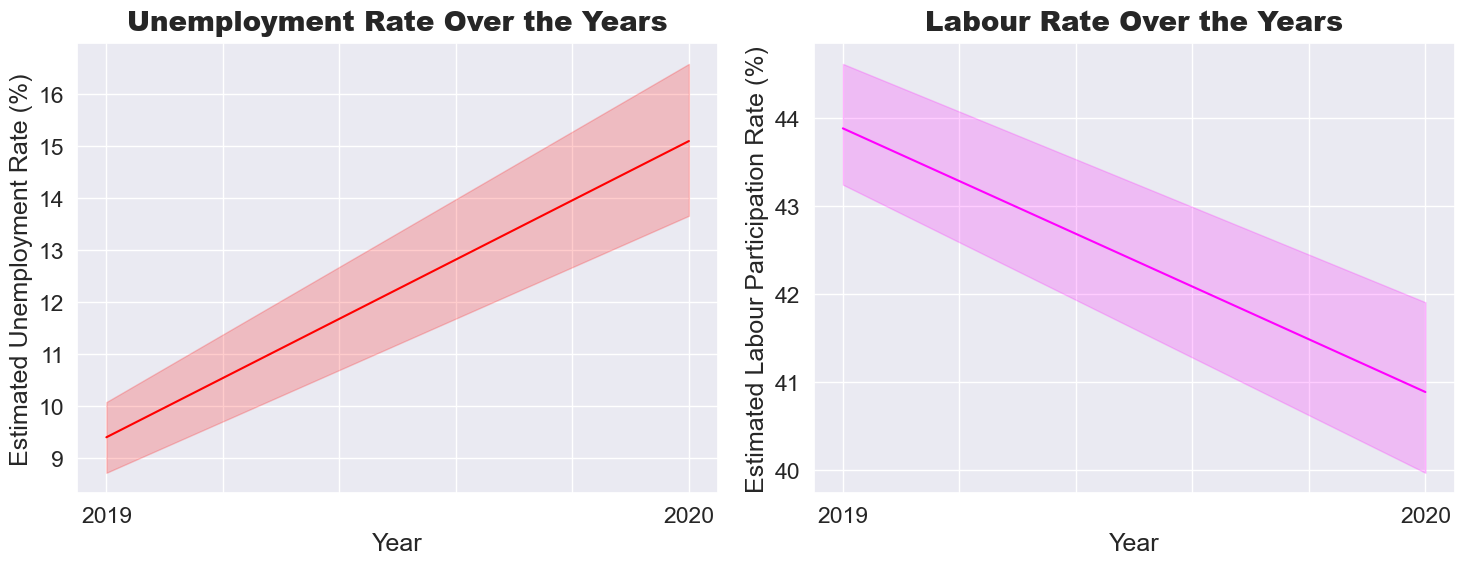

In [63]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.lineplot(df["Year"],df["Estimated Unemployment Rate (%)"],color="red")
ax.set_xticklabels(["","2019","","","","","2020"])
plt.title("Unemployment Rate Over the Years",fontweight="black",fontsize=20,pad=10)

plt.subplot(1,2,2)
ax = sns.lineplot(df["Year"],df["Estimated Labour Participation Rate (%)"],color="magenta")
ax.set_xticklabels(["","2019","","","","","2020"])
plt.title("Labour Rate Over the Years",fontweight="black",fontsize=20,pad=10)
plt.tight_layout()
plt.show()

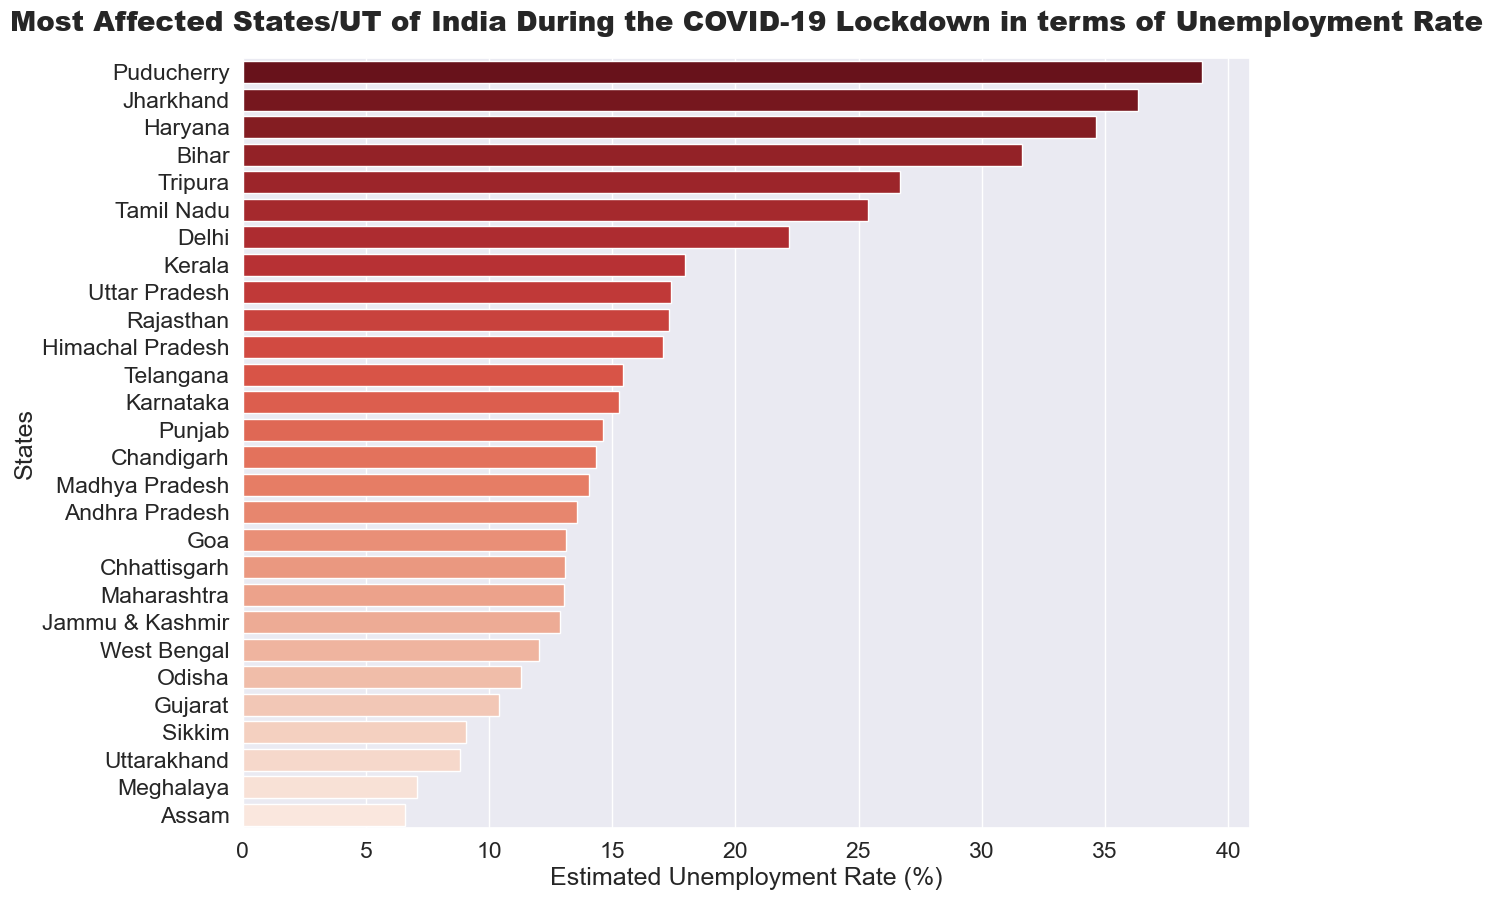

In [70]:
x = df[(df["Year"]==2020) & ((df["Date"].dt.month)>=3)]

z = x.groupby(["States"])["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(13,10))
sns.barplot(z["Estimated Unemployment Rate (%)"],z.index,palette=sns.color_palette("Reds",30)[::-1])
plt.title("Most Affected States/UT of India During the COVID-19 Lockdown in terms of Unemployment Rate",
          fontweight="black",fontsize=20,pad=20)
plt.show()

# Insights
Top 5 most affected states/UT during the COVID-19 Lockdown in terms of Unemployment Rate are:

Puducherry

Jharkhand

Haryana

Bihar

Tripura

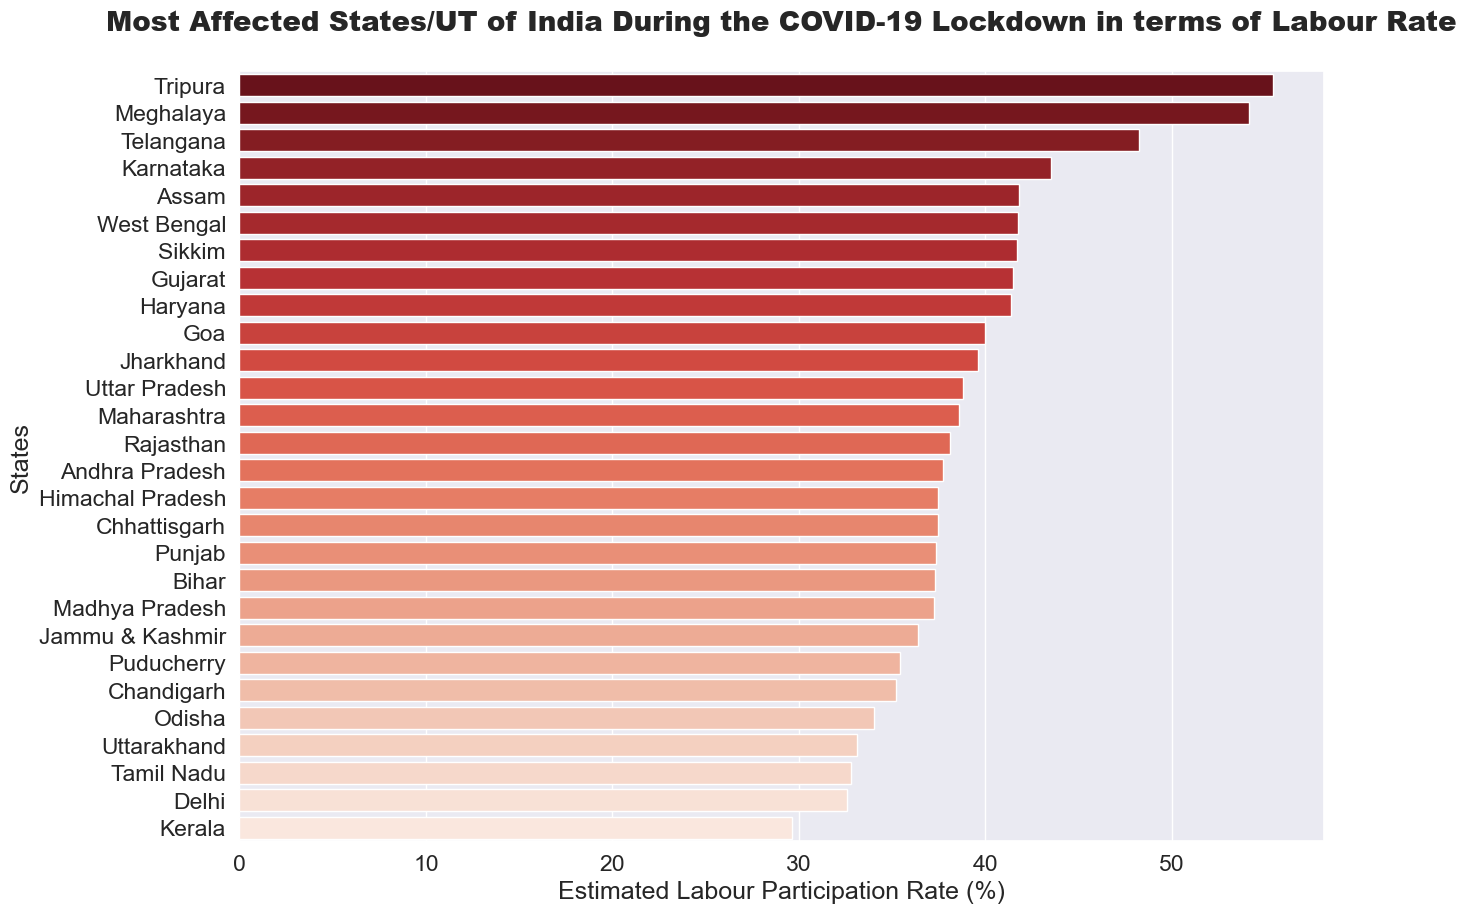

In [71]:
x = df[(df["Year"]==2020) & ((df["Date"].dt.month)>=3)]

z = x.groupby(["States"])["Estimated Labour Participation Rate (%)"].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(14,10))
sns.barplot(z["Estimated Labour Participation Rate (%)"],z.index,palette=sns.color_palette("Reds",30)[::-1])
plt.title("Most Affected States/UT of India During the COVID-19 Lockdown in terms of Labour Rate",
          fontweight="black",fontsize=20,pad=30)
plt.show()

# Insights
Top 5 most affected states/UT during COVID-19 Lockdown in terms of Labour Rate are:

Tripura

Meghalaya

Telangana

Karnataka

Assam